## E05 Claculate spatial distribution of predicted water feature:

#### 0. Load required libraries, site dependant constants and utility functions.

In [2]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns
import joblib
from sklearn import metrics

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

#### 1. Load Exemplary LANDSAT EOPatch :

In [2]:
eo_patch = io_utils.load_exemplary_eopatch(data_product='MODIS',date_range = site.DATE_RANGES_MODIS[-2], patch_id=6, random_choice=False)
eo_patch

Loaded from ../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/2975_maxcc_0.05_x-3_y-136


EOPatch(
  data: {
    DATASET: numpy.ndarray(shape=(194, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 7), dtype=float32)
  }
  mask: {
    IS_DATA: numpy.ndarray(shape=(194, 333, 333, 1), dtype=bool)
    PREDICTED_WATER_FEATURES: numpy.ndarray(shape=(194, 333, 333, 1), dtype=bool)
  }
  scalar: {}
  label: {}
  vector: {}
  data_timeless: {
    DEM_RAW_LAYER: numpy.ndarray(shape=(333, 333, 1), dtype=float32)
    DEM_SLOPE_LAYER: numpy.ndarray(shape=(333, 333, 1), dtype=float32)
  }
  mask_timeless: {}
  scalar_timeless: {
    PREDICTED_WATER_MASK_COVERAGE: numpy.ndarray(shape=(194,), dtype=uint32)
  }
  label_timeless: {}
  vector_timeless: {}
  meta_info: {
    index_x: 3
    index_y: 136
    maxcc: '0.05'
    patch_inde

#### 2. UPE_PROMICE data load:

In [3]:
file_name =  '../../data/aoi/UPE_U_PROMICE_DAILY.xlsx'
sheet = 'UPE_U_PROMICE_DAILY'

import pandas as pd
df = pd.read_excel(io=file_name, sheet_name=sheet)
print(df.head(5))  # print first 5 rows of the dataframe

   Year  MonthOfYear  DayOfMonth  DayOfYear  DayOfCentury  AirPressure(hPa)  \
0  2009            8          18        230          3518            896.88   
1  2009            8          19        231          3519            892.23   
2  2009            8          20        232          3520            891.38   
3  2009            8          21        233          3521            892.62   
4  2009            8          22        234          3522            892.21   

   AirTemperature(C)  AirTemperatureHygroClip(C)  RelativeHumidity(%)  \
0               1.25                        1.02                 83.1   
1               0.41                        0.16                 69.6   
2              -1.08                       -1.22                 65.8   
3              -2.74                       -2.87                 66.7   
4              -1.21                       -1.30                 80.3   

   SpecificHumidity(g/kg)  ...  IceTemperature8(C)  TiltToEast(d)  \
0                

In [106]:
temp_upe_data_2012 =  df[( df.Year == 2012 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]

In [107]:
temp_upe_data_2011 =  df[( df.Year == 2011 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]
#temp_upe_data[['Year', 'MonthOfYear', 'DayOfMonth']]

In [108]:
temp_upe_data_2010 =  df[( df.Year == 2010 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]

In [109]:
temp_upe_data_2009 =  df[( df.Year == 2009 ) & (df.DayOfYear >= 116) & (df.DayOfYear <= 309) ]

In [113]:
temperatures = np.zeros(194)

In [114]:
temperatures

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [115]:
temperatures[-80:] = temp_upe_data_2009['AirTemperature(C)']

In [116]:
temperatures

array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
      

In [127]:
temp_upe_data_2009

,Year,MonthOfYear,DayOfMonth,DayOfYear,DayOfCentury,AirPressure(hPa),AirTemperature(C),AirTemperatureHygroClip(C),RelativeHumidity(%),SpecificHumidity(g/kg),...,IceTemperature8(C),TiltToEast(d),TiltToNorth(d),LatitudeGPS_HDOP<1(degN),LongitudeGPS_HDOP<1(degW),ElevationGPS_HDOP<1(m),HorDilOfPrecGPS_HDOP<1,LoggerTemperature(C),FanCurrent(mA),BatteryVoltage(V)
0,2009,8,18,230,3518,896.88,1.25,1.02,83.1,3.86,...,-6.54,0.31,-0.09,72.891440,53.534897,979.9,0.83,1.60,129.3,13.33
1,2009,8,19,231,3519,892.23,0.41,0.16,69.6,3.07,...,-6.59,0.23,0.14,72.891442,53.534928,980.6,0.83,0.58,131.5,13.31
2,2009,8,20,232,3520,891.38,-1.08,-1.22,65.8,2.60,...,-6.58,0.29,0.12,72.891444,53.534922,980.3,0.86,-0.45,142.0,14.07
3,2009,8,21,233,3521,892.62,-2.74,-2.87,66.7,2.29,...,-6.58,0.33,0.21,72.891445,53.534952,980.3,0.82,-2.13,139.1,14.04
4,2009,8,22,234,3522,892.21,-1.21,-1.30,80.3,3.11,...,-6.58,0.28,0.28,72.891443,53.534975,979.7,0.87,-0.16,135.7,13.82
5,2009,8,23,235,3523,893.87,-2.22,-2.36,65.7,2.33,...,-6.57,0.32,0.22,72.891436,53.534983,979.7,0.85,-1.84,138.8,14.00
6,2009,8,24,236,3524,893.21,-1.28,-1.44,64.8,2.50,...,-6.56,0.29,0.12,72.891432,53.534991,980.5,0.85,-0.98,140.6,13.93
7,2009,8,25,237,3525,894.95,-0.97,-1.09,68.1,2.70,...,-6.56,0.26,0.38,72.891439,53.535033,979.4,0.81,-0.39,136.7,13.91
8,2009,8,26,238,3526,891.71,0.75,0.56,65.6,2.96,...,-6.55,0.10,0.54,72.891433,53.535046,979.4,0.84,0.77,137.6,13.87
9,2009,8,27,239,3527,894.04,1.50,1.33,70.5,3.35,...,-6.54,0.09,0.58,72.891433,53.535054,980.7,0.83,1.69,137.3,13.77


#### 3. Perform spatial analysis for predicted water features:

C:\Users\Kamil\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([-30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.]),
 <a list of 9 Text yticklabel objects>)

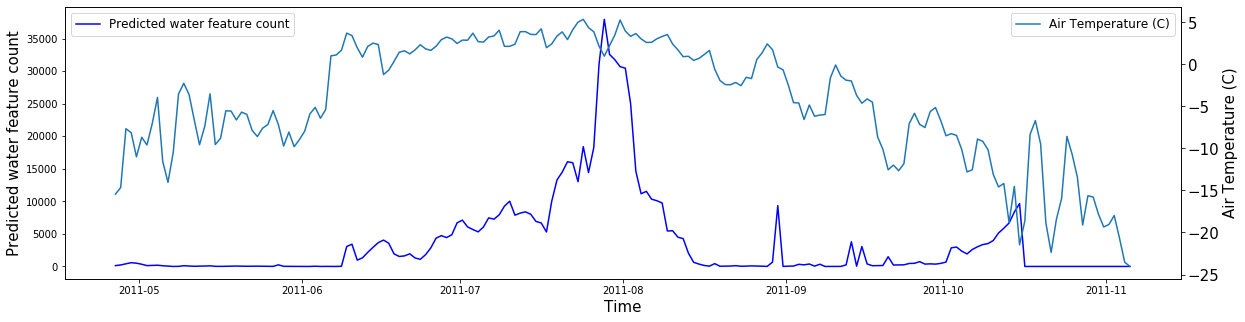

In [5]:
import matplotlib.pyplot as plt
predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, predicted_water_feature_distribution, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
#plt.ylabel('Predicted water feature count', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.legend(loc=2, prop={'size': 12});

#### 4. Plot analysis for all patches in 2011:

In [146]:
site.DATE_RANGES_MODIS[-1:]

[('2012-04-26', '2012-11-05')]

In [147]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-1:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
    

Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
Wall time: 3min 34s


In [148]:
predicted_water_feature_count[0].shape

(194,)

In [149]:
stacked_pwf = np.vstack( predicted_water_feature_count )

In [150]:
stacked_pwf.shape

(55, 194)

In [151]:
daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)

In [152]:
daily_sum_of_pwf.shape

(194,)

In [153]:
np.sum(daily_sum_of_pwf)

31255337

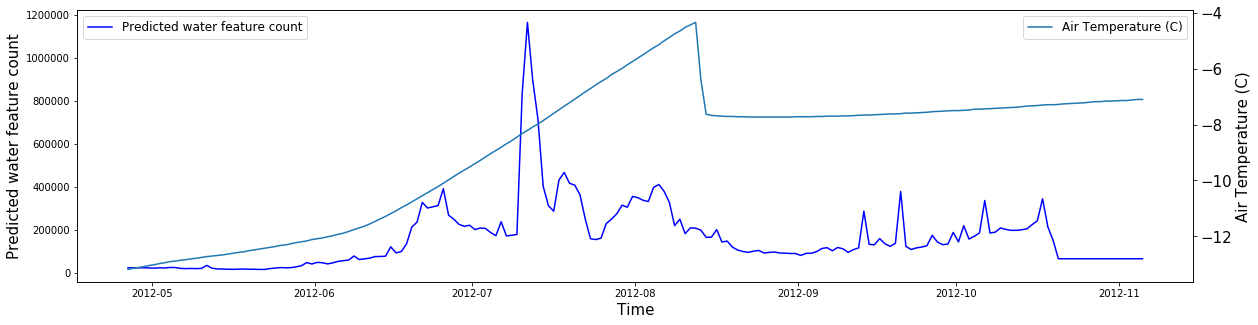

In [158]:
#import matplotlib.pyplot as plt
#predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data_2012[['IceTemperature8(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('plot_temp_vs_water_2012.png')

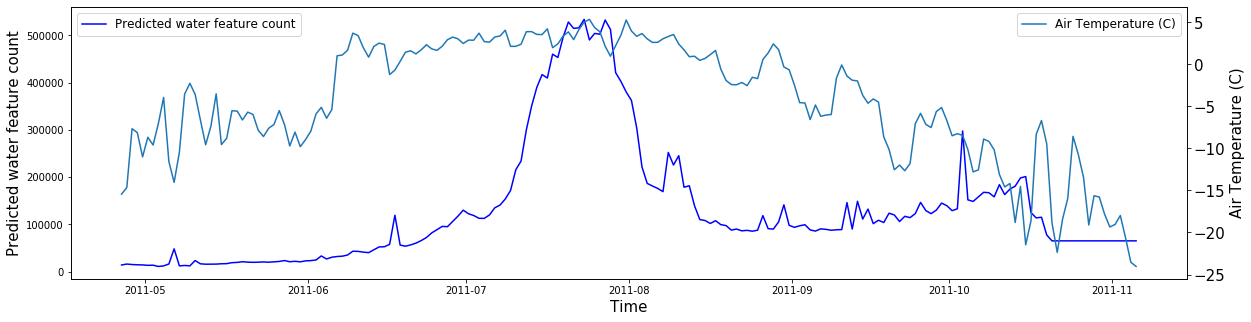

In [145]:
#import matplotlib.pyplot as plt
#predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data_2011[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('plot_temp_vs_water_2011.png')

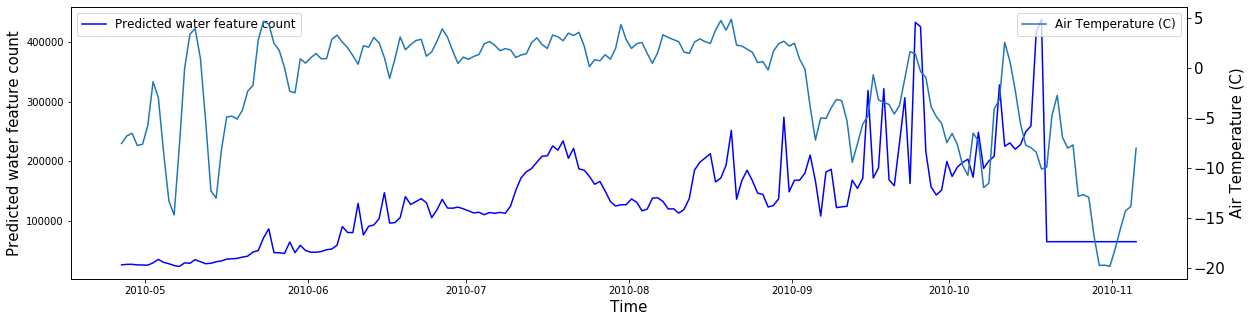

In [136]:
#import matplotlib.pyplot as plt
#predicted_water_feature_distribution = eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE']
temperature_distribution = temp_upe_data_2010[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

ax2 = ax1.twinx()
ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('plot_temp_vs_water_2010.png')

In [ ]:
Without temperature for the years 2000-2008

In [104]:
site.DATE_RANGES_MODIS[-13:-4][0][0][:4]

'2000'

Reading EOPatches from: ('2000-04-26', '2000-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2000_04-2000_11/
water feature for year number 2000 : 15636328
Reading EOPatches from: ('2001-04-26', '2001-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2001_04-2001_11/
water feature for year number 2001 : 32736016
Reading EOPatches from: ('2002-04-26', '2002-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2002_04-2002_11/
water feature for year number 2002 : 45332378
Reading EOPatches from: ('2003-04-26', '2003-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2003_04-2003_11/
water feature for year number 2003 : 29979349
Reading EOPatches from: ('2004-04-26', '2004-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2004_04-2004_11/
water feature for year number 2004 : 20464461
Reading EOPatches from: ('2005-04-26', '2005-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2005_04-2005_11/
water feature for year number 2005 : 24823813
Reading EOPatches from

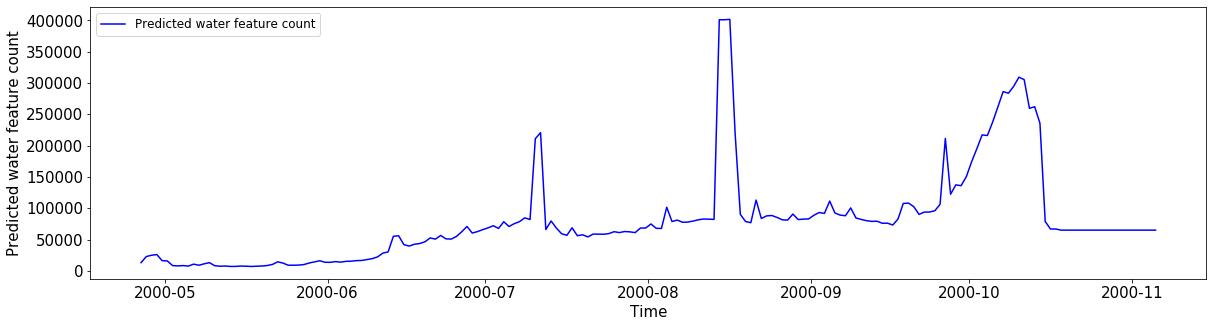

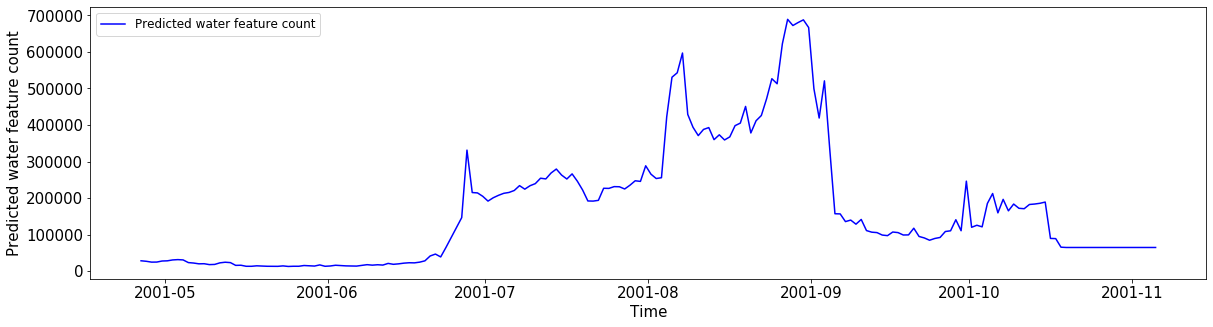

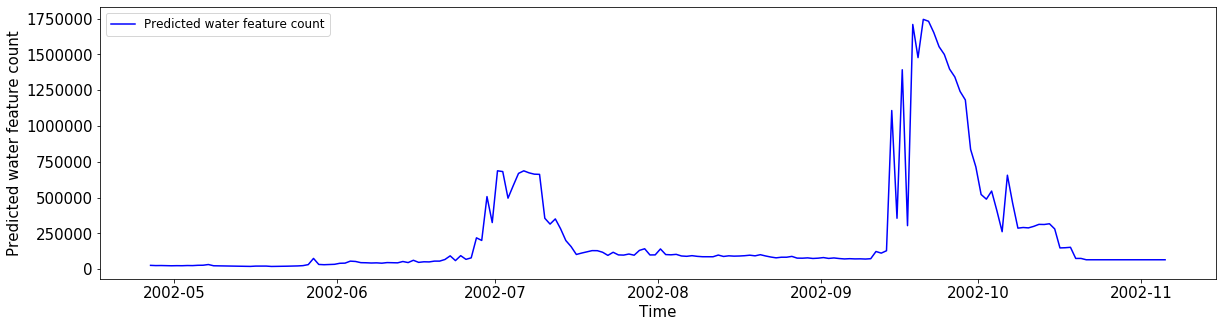

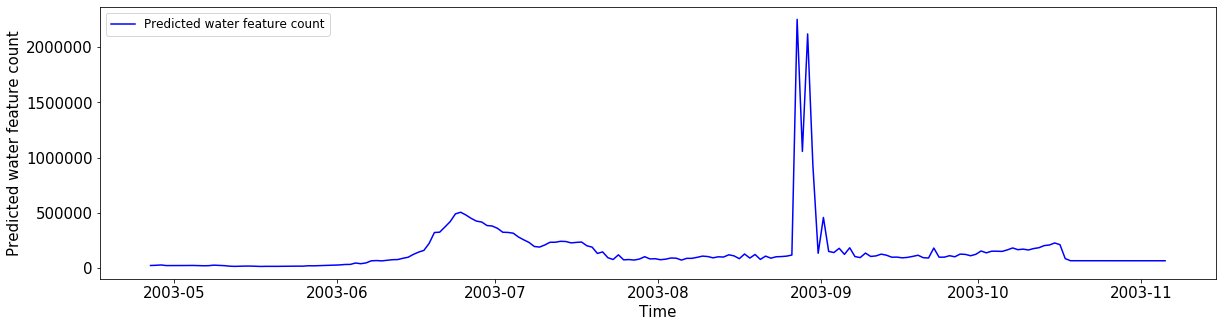

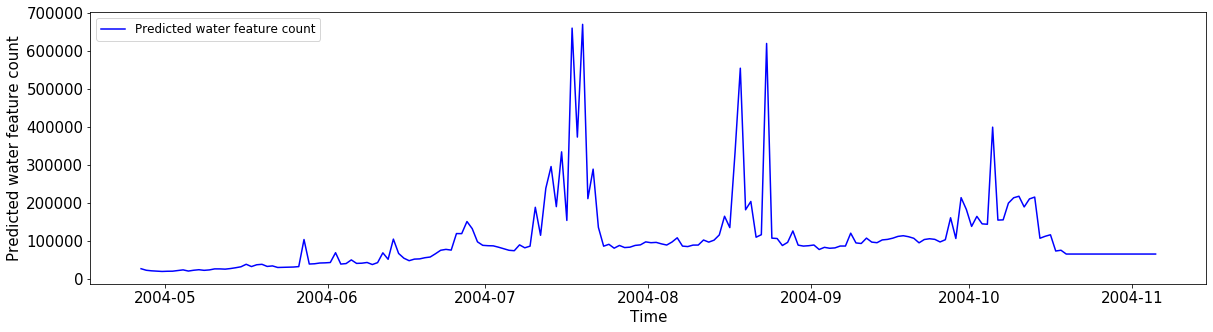

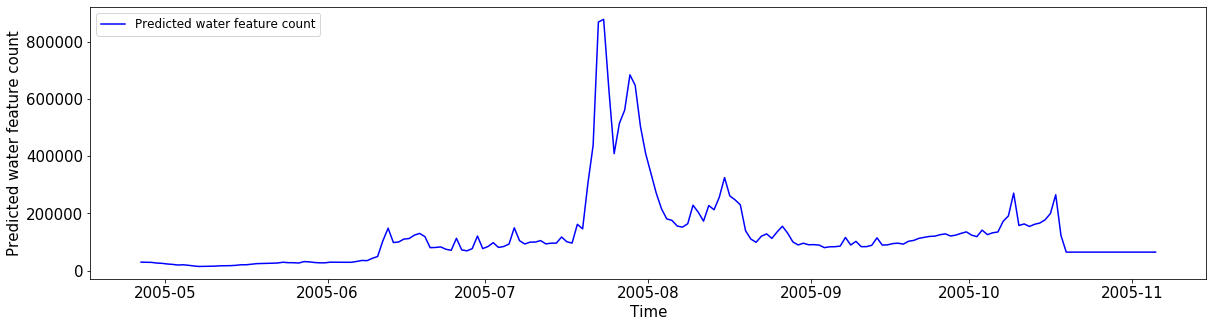

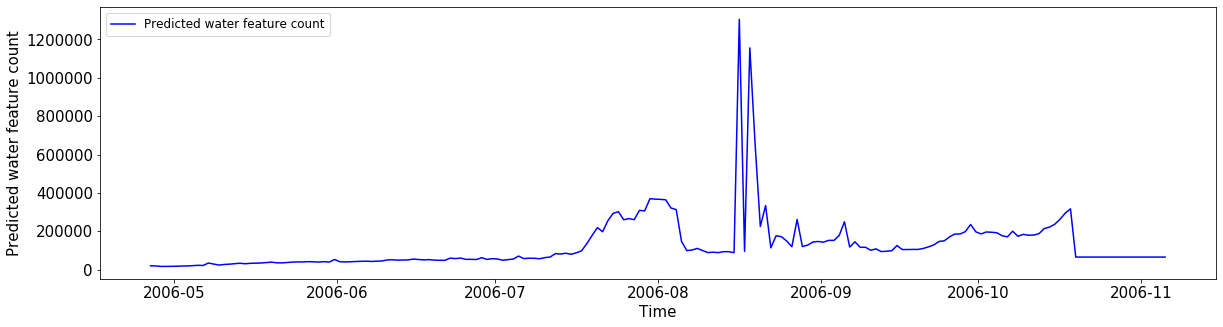

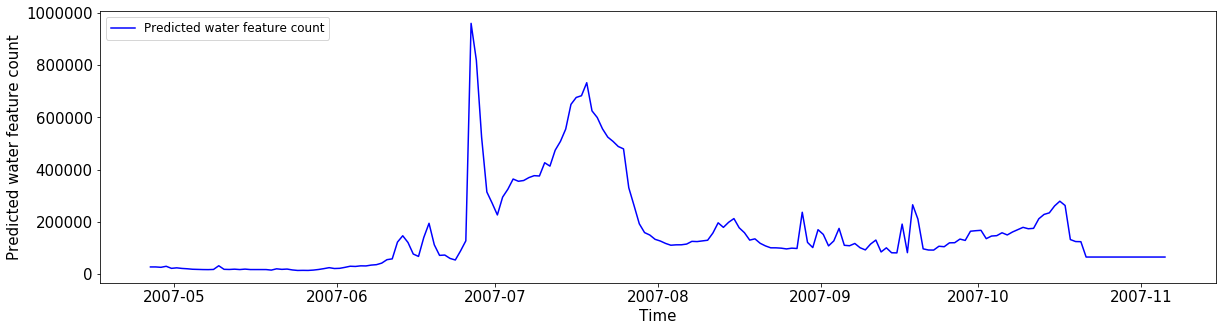

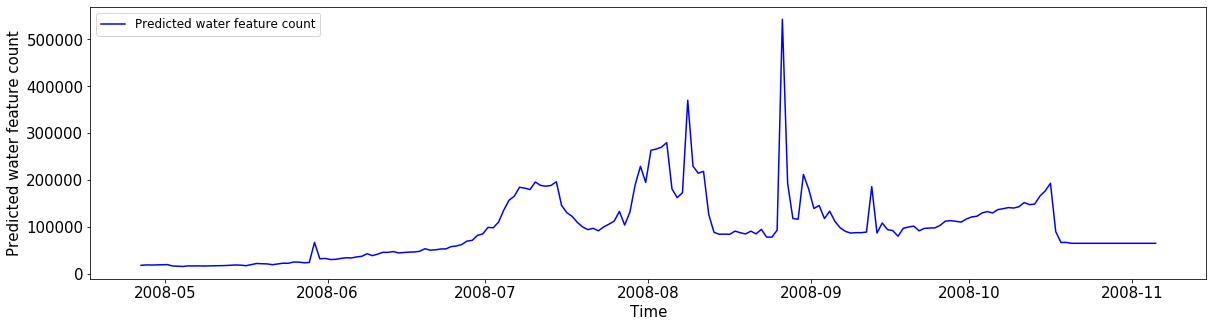

In [105]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-13:-4]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))
    time = np.array(eo_patch.timestamp)
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
    ax1.legend(loc=2, prop={'size': 12});
    ax1.set_ylabel('Predicted water feature count', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_temp_vs_water_{}.png'.format(str(date_range_modis[0][:4])))

In [155]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-13:-4]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))

Reading EOPatches from: ('2000-04-26', '2000-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2000_04-2000_11/
water feature for year number 2000 : 15636328
top day per season 2000 : 401588
Reading EOPatches from: ('2001-04-26', '2001-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2001_04-2001_11/
water feature for year number 2001 : 32736016
top day per season 2001 : 689101
Reading EOPatches from: ('2002-04-26', '2002-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2002_04-2002_11/
water feature for year number 2002 : 45332378
top day per season 2002 : 1745145
Reading EOPatches from: ('2003-04-26', '2003-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2003_04-2003_11/
water feature for year number 2003 : 29979349
top day per season 2003 : 2252828
Reading EOPatches from: ('2004-04-26', '2004-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2004_04-2004_11/
water feature for year number 2004 : 20464461
top day per season 2004 : 669198
Reading EOPatches 

In [156]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-4:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))

Reading EOPatches from: ('2009-04-26', '2009-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2009_04-2009_11/
water feature for year number 2009 : 25586375
top day per season 2009 : 1122104
Reading EOPatches from: ('2010-04-26', '2010-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2010_04-2010_11/
water feature for year number 2010 : 25766980
top day per season 2010 : 437728
Reading EOPatches from: ('2011-04-26', '2011-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/
water feature for year number 2011 : 25354627
top day per season 2011 : 533952
Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
water feature for year number 2012 : 31255337
top day per season 2012 : 1163811
Wall time: 15min 18s


In [3]:
eo_patch = io_utils.load_exemplary_eopatch(data_product='MODIS',date_range = site.DATE_RANGES_MODIS[-2], patch_id=6, random_choice=False)
eo_patch

Loaded from ../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/2975_maxcc_0.05_x-3_y-136


EOPatch(
  data: {
    DATASET: numpy.ndarray(shape=(194, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(194, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS: numpy.ndarray(shape=(194, 333, 333, 7), dtype=float32)
    PRED_WAT_FEAT_HEIGHT: numpy.ndarray(shape=(194, 333, 333, 1), dtype=int32)
  }
  mask: {
    IS_DATA: numpy.ndarray(shape=(194, 333, 333, 1), dtype=bool)
    PREDICTED_WATER_FEATURES: numpy.ndarray(shape=(194, 333, 333, 1), dtype=bool)
  }
  scalar: {
    TOP_50_HEIGHTS: numpy.ndarray(shape=(194, 50), dtype=int32)
  }
  label: {}
  vector: {}
  data_timeless: {
    DEM_RAW_LAYER: numpy.ndarray(shape=(333, 333, 1), dtype=float32)
    DEM_SLOPE_LAYER: numpy.ndarray(shape=(333, 333, 1), dtype=float32)
  }
  mask_timeless: {}
  scalar_timeless: {
    PREDICTED_WATER_MASK_COVERAGE: numpy.ndarray(shape=(1

C:\Users\Kamil\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text yticklabel objects>)

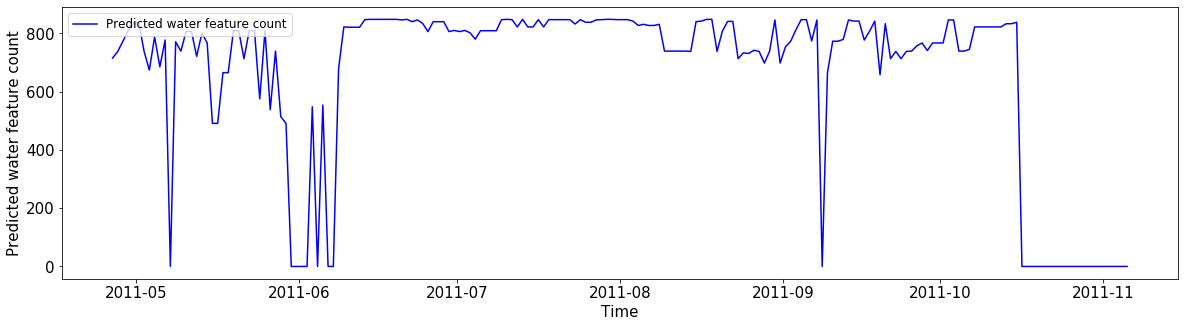

In [4]:
import matplotlib.pyplot as plt
predicted_water_feature_height = eo_patch.scalar['TOP_50_HEIGHTS'][..., -1]
#temperature_distribution = temp_upe_data[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

#ax2 = ax1.twinx()
ax1.plot(time, predicted_water_feature_height, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

#ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
#ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
#ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
#plt.ylabel('Predicted water feature count', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [9]:
np.average(eo_patch.scalar['TOP_50_HEIGHTS'][..., -5:], axis=-1)

array([715. , 733.2, 773.2, 809. , 835.4, 835.4, 723.2, 673.2, 787. ,
       684.4, 734.4,   0. , 770.2, 738.6, 806. , 753.2, 718.4, 736.8,
       766.6, 489.8, 489.8, 612.4, 599.4, 807.2, 807.2, 552.6, 807.2,
       807.2, 535.6, 807.2, 499.6, 738.2, 509.6, 489.8,   0. ,   0. ,
         0. ,   0. , 546.6,   0. , 549.4,   0. ,   0. , 679. , 819.4,
       819.4, 819.4, 819.4, 846.6, 848. , 848. , 848. , 848. , 848. ,
       848. , 845.4, 848. , 840. , 844.8, 833.4, 806. , 840. , 840. ,
       840. , 806. , 808.8, 806. , 808.8, 801.4, 778.2, 809. , 809. ,
       809. , 809. , 846.4, 848. , 845.6, 822. , 848. , 822. , 822. ,
       845.6, 788.4, 847. , 846. , 845.6, 846.4, 846. , 832. , 845.6,
       837. , 837. , 846. , 847. , 848. , 848. , 847. , 847. , 847. ,
       840.6, 826.4, 831. , 826.4, 826.4, 831. , 738.6, 738.6, 738.2,
       738.4, 738.4, 738. , 839.8, 841.4, 848. , 848. , 723.4, 806. ,
       840. , 840. , 674.4, 718.2, 725. , 741.2, 736.2, 537. , 738.6,
       846. , 697.4,

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text yticklabel objects>)

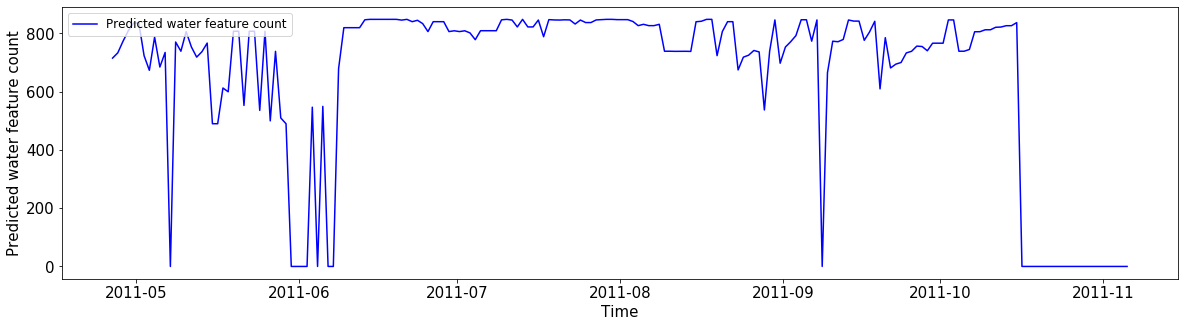

In [10]:
import matplotlib.pyplot as plt
predicted_water_feature_height = np.average(eo_patch.scalar['TOP_50_HEIGHTS'][..., -5:], axis=-1)
#temperature_distribution = temp_upe_data[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

#ax2 = ax1.twinx()
ax1.plot(time, predicted_water_feature_height, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

#ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
#ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
#ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
#plt.ylabel('Predicted water feature count', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text yticklabel objects>)

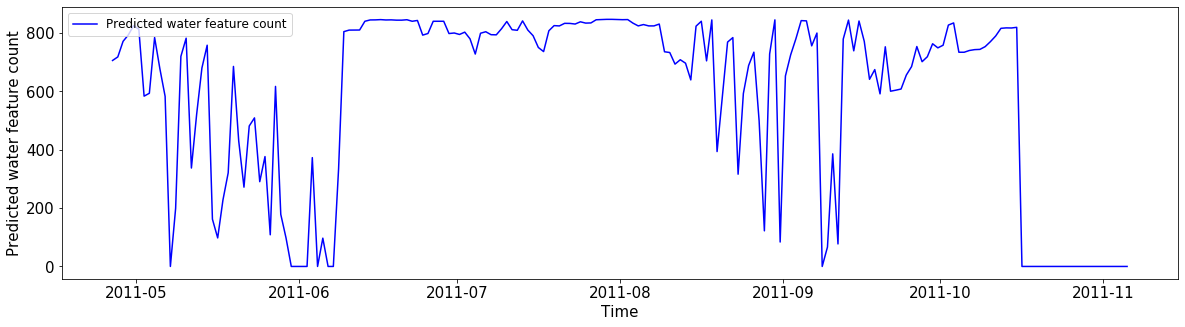

In [11]:
import matplotlib.pyplot as plt
predicted_water_feature_height = np.average(eo_patch.scalar['TOP_50_HEIGHTS'][..., :], axis=-1)
#temperature_distribution = temp_upe_data[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')

#ax2 = ax1.twinx()
ax1.plot(time, predicted_water_feature_height, 'b-', label='Predicted water feature count')
ax1.legend(loc=2, prop={'size': 12});

#ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
#ax2.legend(loc=1, prop={'size': 12});

ax1.set_ylabel('Predicted water feature count', fontsize=15)
#ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_xlabel('Time', fontsize=15)
#plt.ylabel('Predicted water feature count', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
Maximum hegight of predicted features

In [13]:
%%time
# application dataset building eotasks for all aval eopatches in the a eoworkflow
predicted_water_feature_heights =[]
for date_range_modis in site.DATE_RANGES_MODIS[-1:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_heights.append(eo_patch.scalar['TOP_50_HEIGHTS'][..., -1])
        #del eo_patch

Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
Wall time: 3min 53s


In [15]:
predicted_water_feature_heights

[array([1213, 1209, 1209, 1209, 1226, 1213, 1226, 1226, 1226, 1226, 1226,
        1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226,
        1226, 1213, 1213, 1209, 1226, 1226, 1226, 1226, 1226, 1226, 1226,
        1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226,
        1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1226, 1218, 1218,
        1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218,
        1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218,
        1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218,
        1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218,
        1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218,
        1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218,
        1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218, 1218,
        1218, 1218, 1228, 1228, 1226, 1226, 1226, 1226, 1226, 1226, 1226,
        1226, 1226, 1226, 1226, 1226, 

In [16]:
stacked_pwfh = np.vstack( predicted_water_feature_heights )

In [17]:
stacked_pwfh.shape

(55, 194)

In [20]:
pwfh_max = np.max(stacked_pwfh, axis=0)

In [22]:
pwfh_max.shape


(194,)

(array([1100., 1200., 1300., 1400., 1500., 1600., 1700., 1800., 1900.]),
 <a list of 9 Text yticklabel objects>)

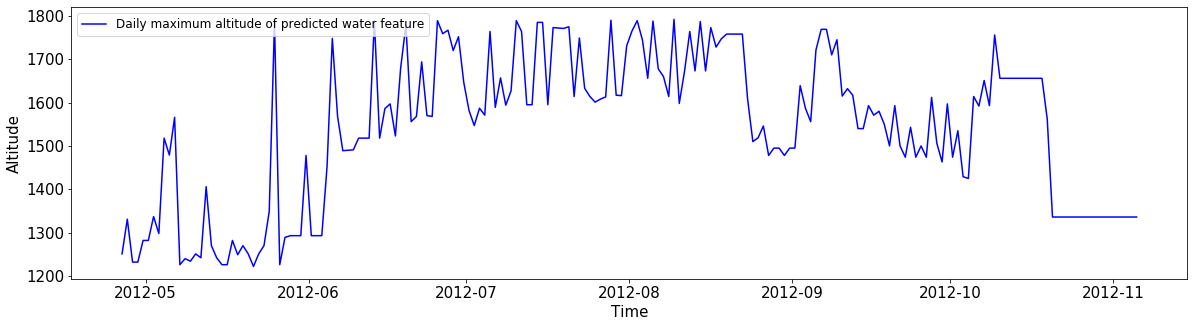

In [26]:
import matplotlib.pyplot as plt
predicted_water_feature_height = pwfh_max
#temperature_distribution = temp_upe_data[['AirTemperature(C)']]
time = np.array(eo_patch.timestamp) # x axis
#t, w, h, _ = ndvi.shape 


fig, ax1 = plt.subplots(figsize=(20,5))

#plt.plot(predicted_water_feature_distribution, 's-', label = 'Predicted water feature count')
#plt.plot(time, predicted_water_feature_distribution, 'o-', label='Predicted water feature count')
#plt.plot(time,temperature_distribution, 's-', label = 'Air Temperature (C)')


ax1.plot(time, predicted_water_feature_height, 'b-', label='Daily maximum altitude')
ax1.legend(loc=2, prop={'size': 12});

#ax2 = ax1.twinx()
#ax2.plot(time, temperature_distribution, '-', label = 'Air Temperature (C)')
#ax2.legend(loc=1, prop={'size': 12});
#ax2.set_ylabel('Air Temperature (C)', fontsize=15)

ax1.set_ylabel('Altitude', fontsize=15)


ax1.set_xlabel('Time', fontsize=15)
#plt.ylabel('Predicted water feature count', fontsize=12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [28]:
site.DATE_RANGES_MODIS[-13:]

[('2000-04-26', '2000-11-05'),
 ('2001-04-26', '2001-11-05'),
 ('2002-04-26', '2002-11-05'),
 ('2003-04-26', '2003-11-05'),
 ('2004-04-26', '2004-11-05'),
 ('2005-04-26', '2005-11-05'),
 ('2006-04-26', '2006-11-05'),
 ('2007-04-26', '2007-11-05'),
 ('2008-04-26', '2008-11-05'),
 ('2009-04-26', '2009-11-05'),
 ('2010-04-26', '2010-11-05'),
 ('2011-04-26', '2011-11-05'),
 ('2012-04-26', '2012-11-05')]

Reading EOPatches from: ('2000-04-26', '2000-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2000_04-2000_11/
water feature max value for year number 2000 : 1790
Avg: 1544.118556701031
Std: 189.36451339678024
Var: 35858.91893399936
Min: 1215
Max: 1790
Med: 1557.0
top day per season 2000 : 1790
Reading EOPatches from: ('2001-04-26', '2001-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2001_04-2001_11/
water feature max value for year number 2001 : 1791
Avg: 1551.9322916666667
Std: 185.1860567751118
Var: 34293.87562391493
Min: 1224
Max: 1791
Med: 1603.0
top day per season 2001 : 1791
Reading EOPatches from: ('2002-04-26', '2002-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2002_04-2002_11/
water feature max value for year number 2002 : 1792
Avg: 1548.0618556701031
Std: 149.79080356840967
Var: 22437.28483366989
Min: 1321
Max: 1792
Med: 1556.0
top day per season 2002 : 1792
Reading EOPatches from: ('2003-04-26', '2003-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/U

C:\Users\Kamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Kamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Reading EOPatches from: ('2011-04-26', '2011-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/
water feature max value for year number 2011 : 1792
Avg: 1534.7061855670104
Std: 161.6140919103492
Var: 26119.114704006803
Min: 1270
Max: 1792
Med: 1556.0
top day per season 2011 : 1792
Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
water feature max value for year number 2012 : 1792
Avg: 1539.5876288659795
Std: 173.57132599533767
Var: 30127.005207779785
Min: 1222
Max: 1792
Med: 1570.5
top day per season 2012 : 1792
Wall time: 42min 57s


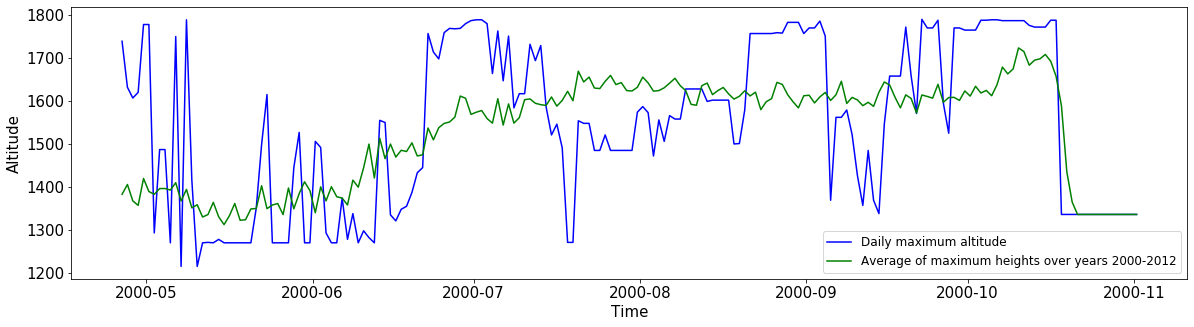

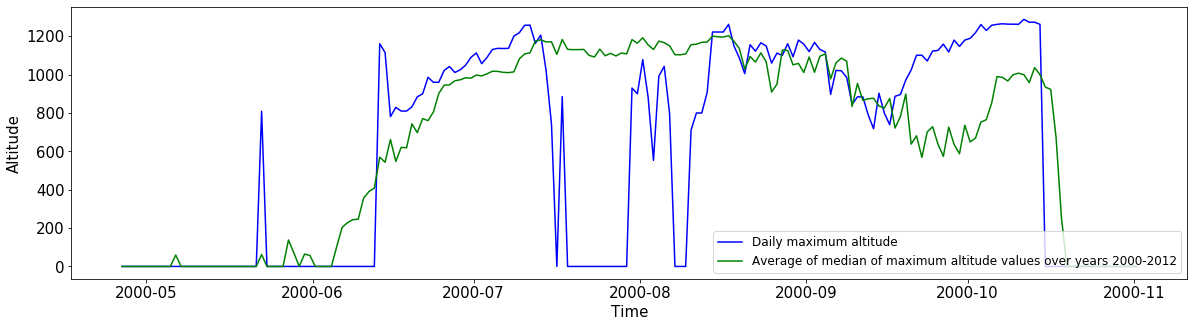

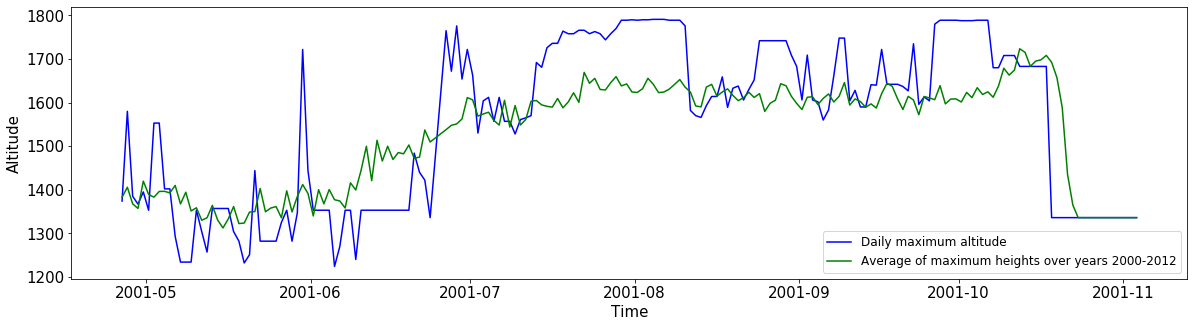

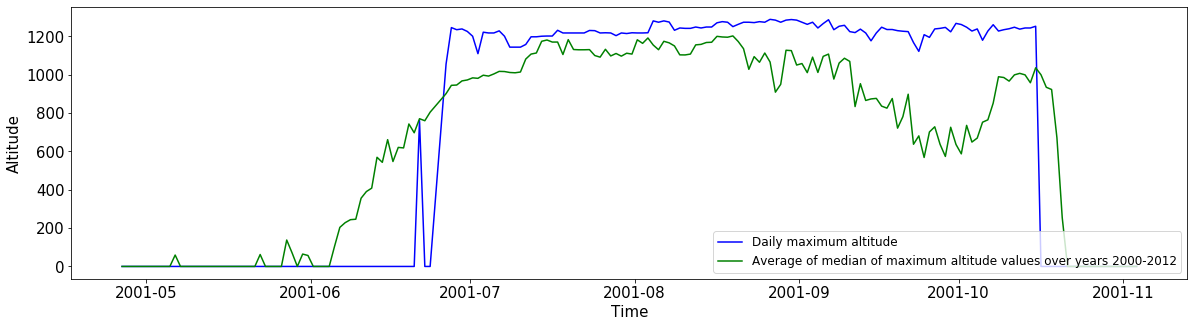

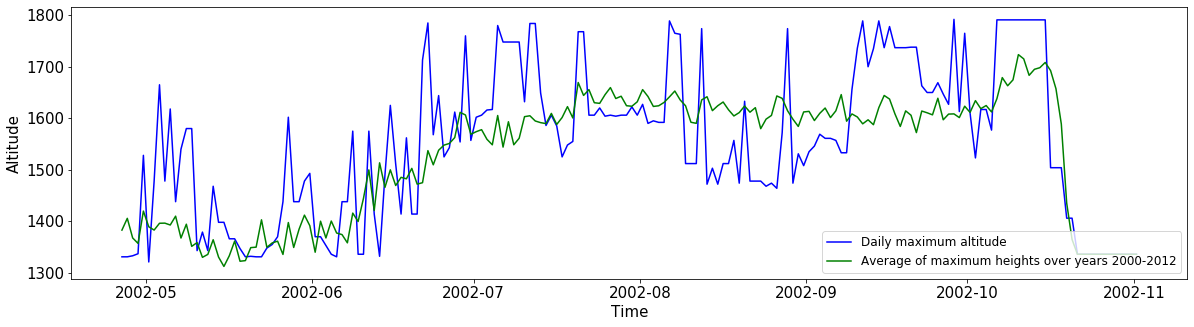

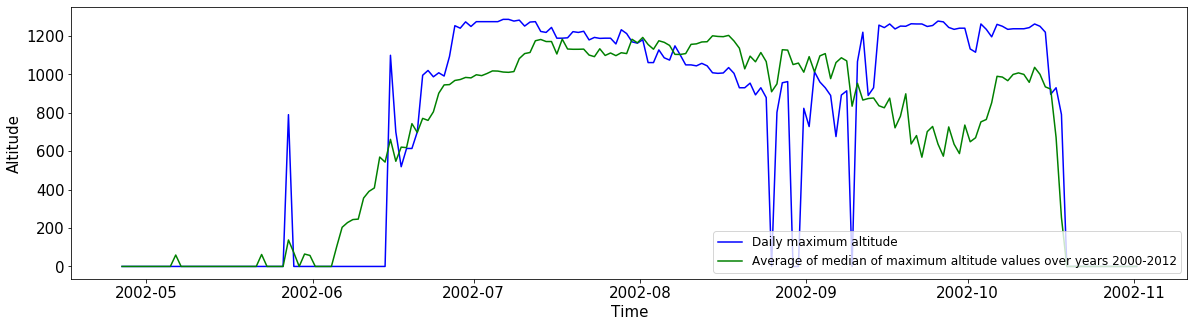

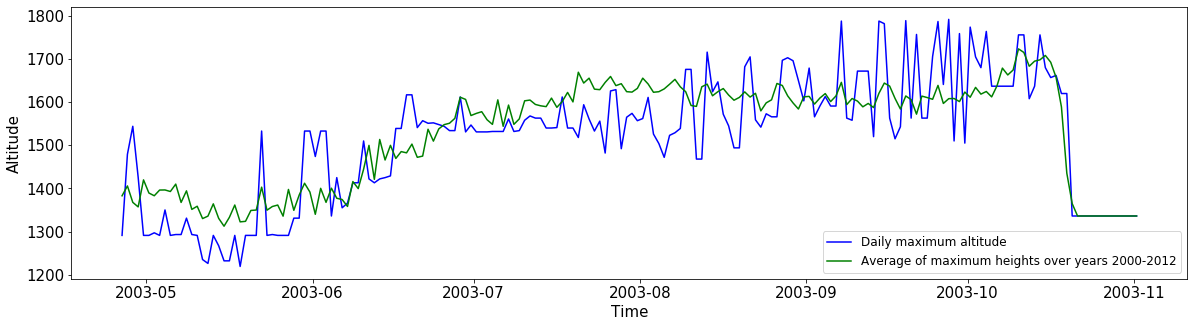

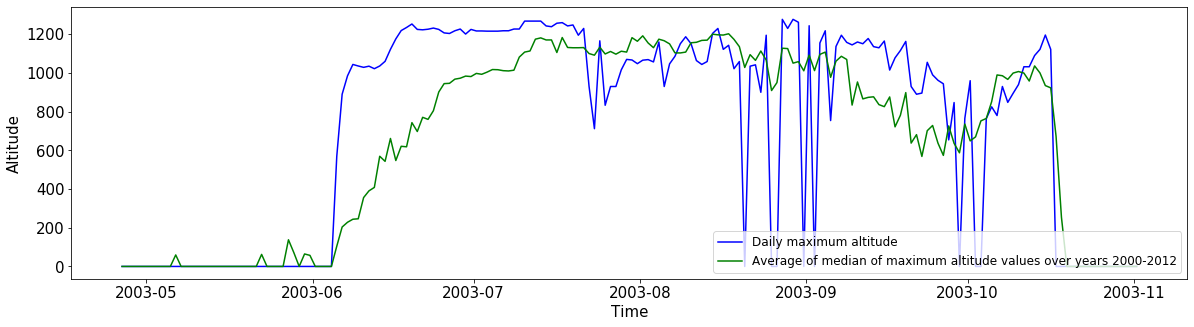

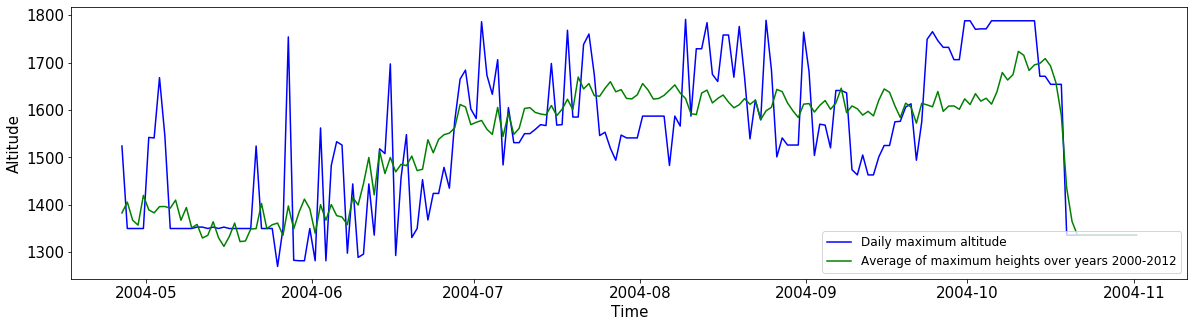

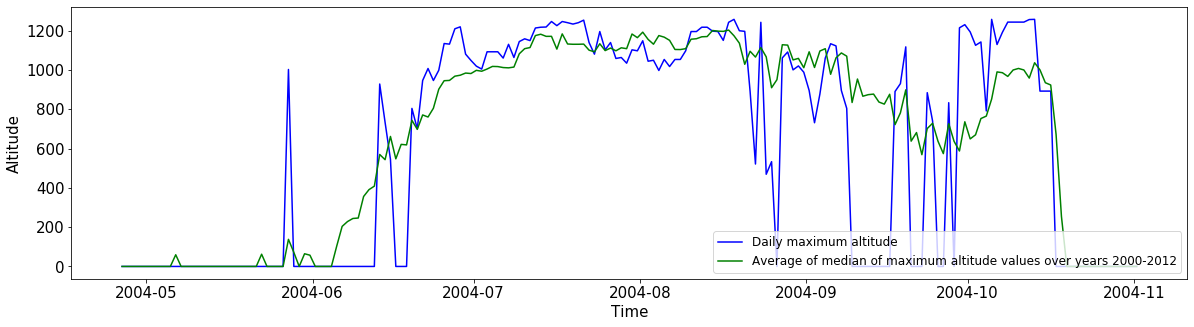

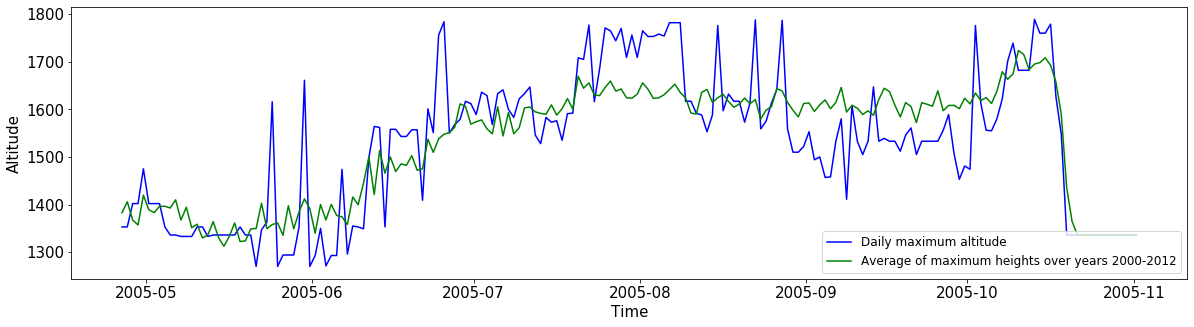

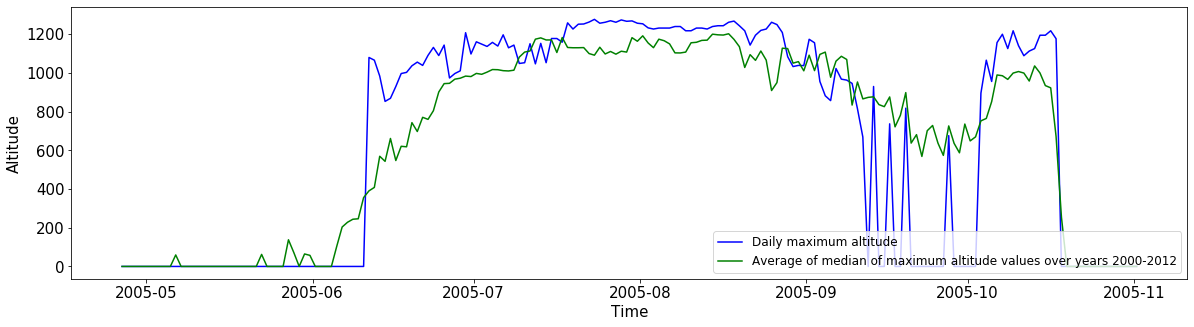

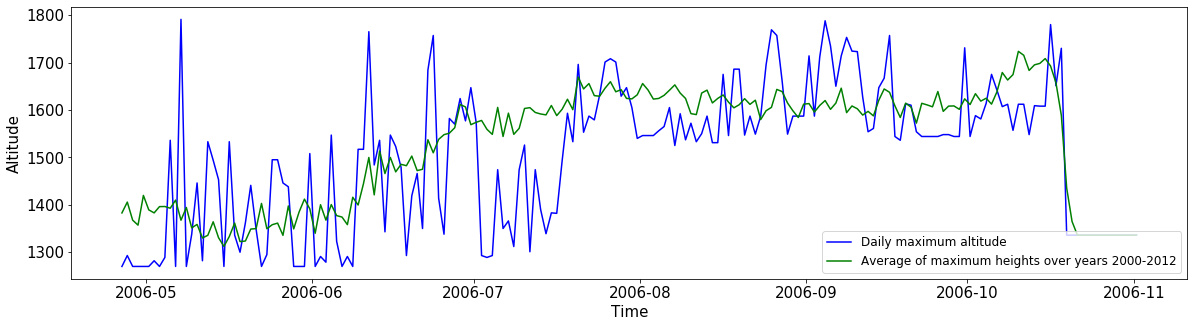

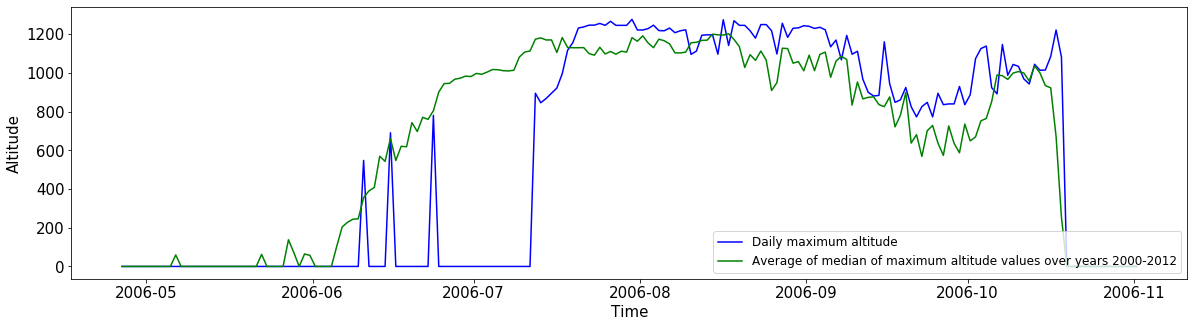

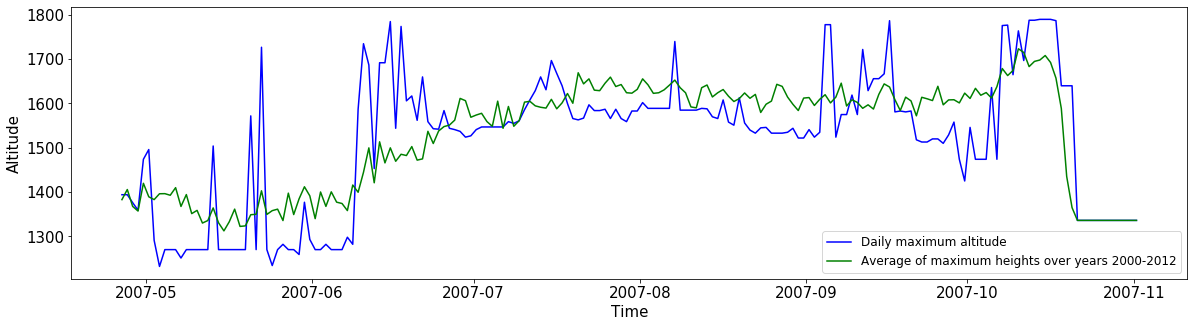

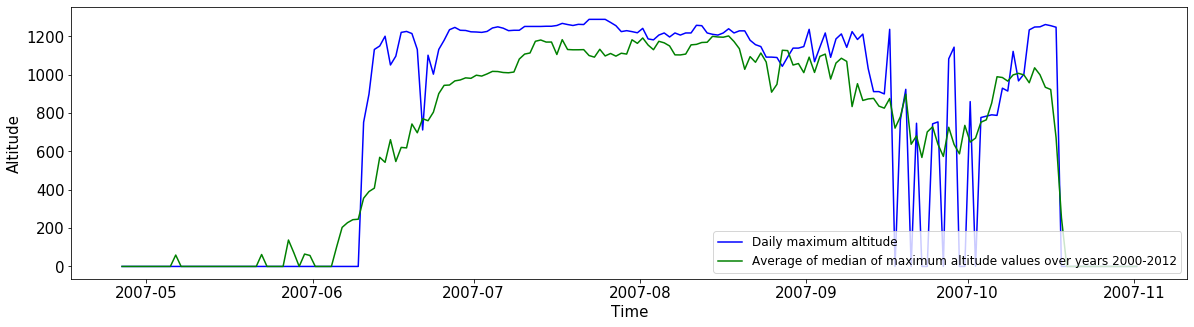

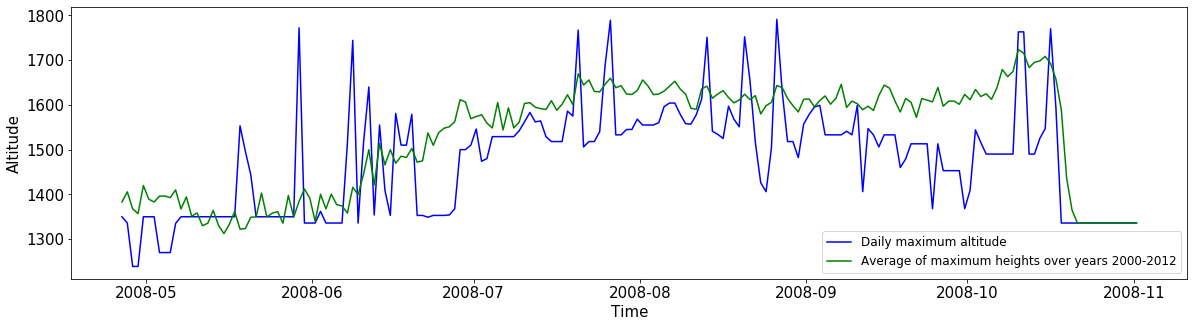

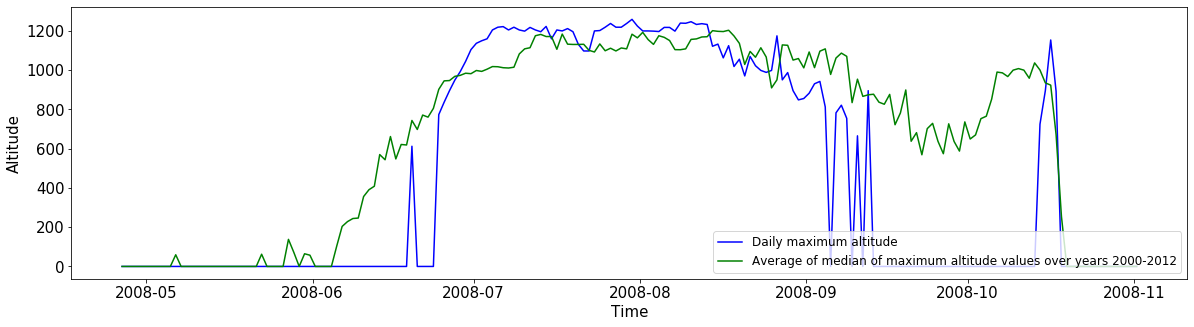

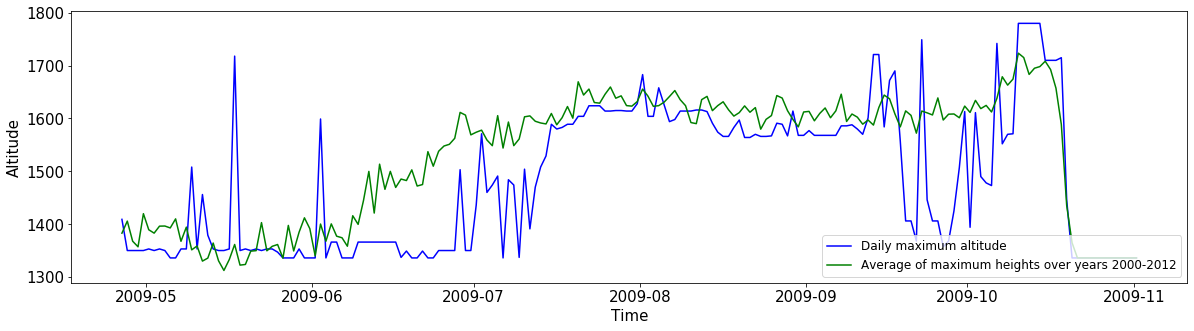

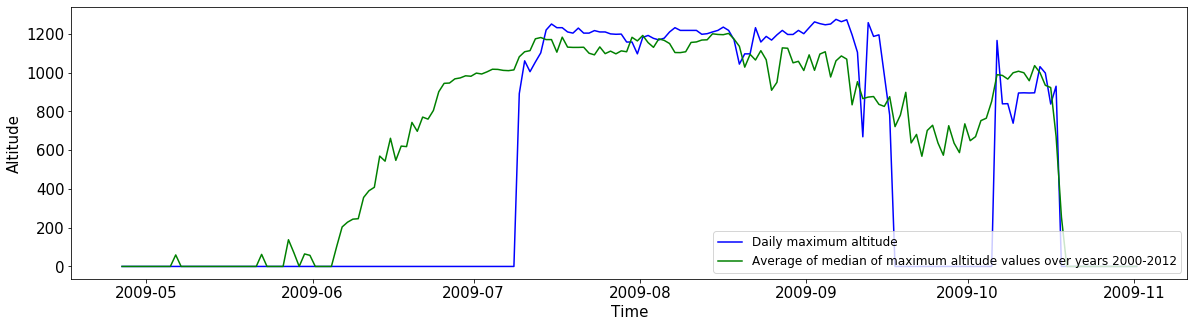

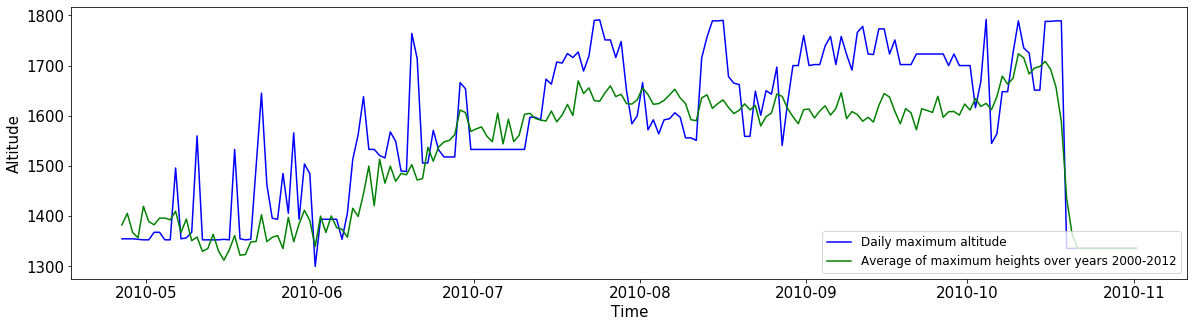

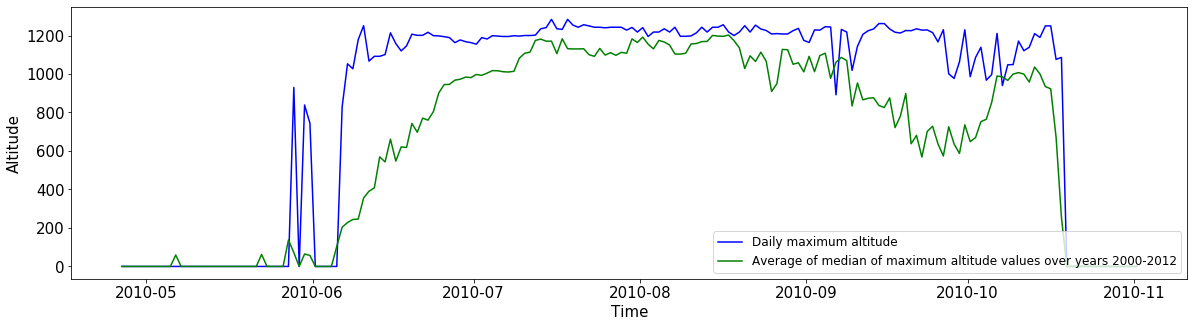

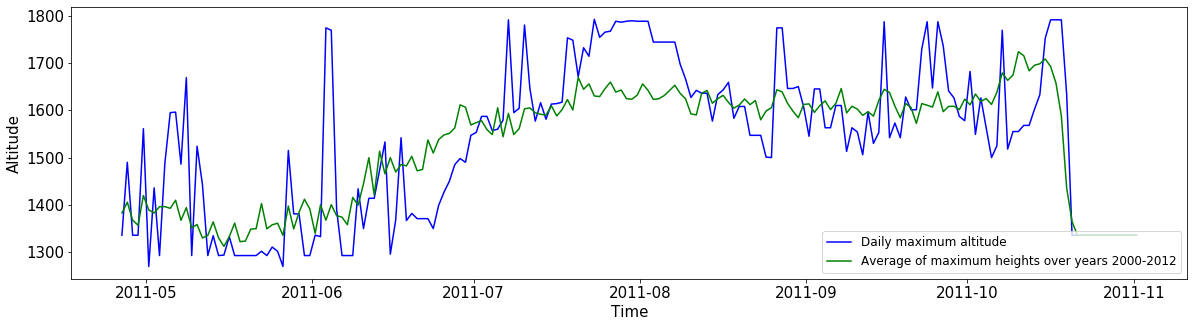

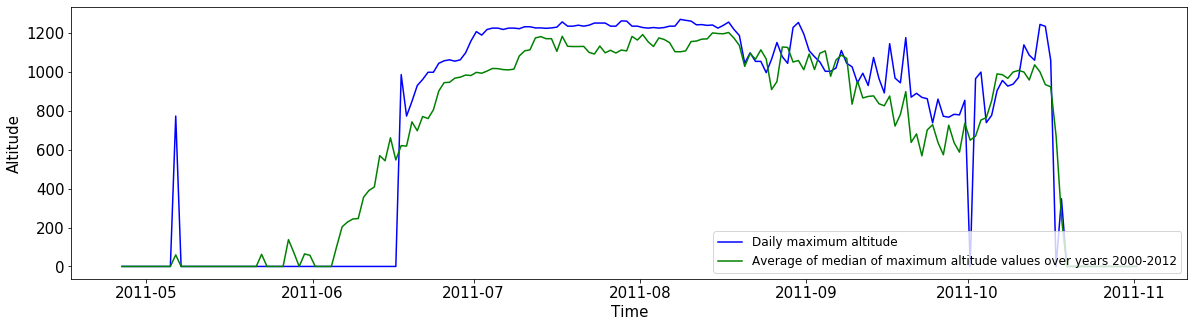

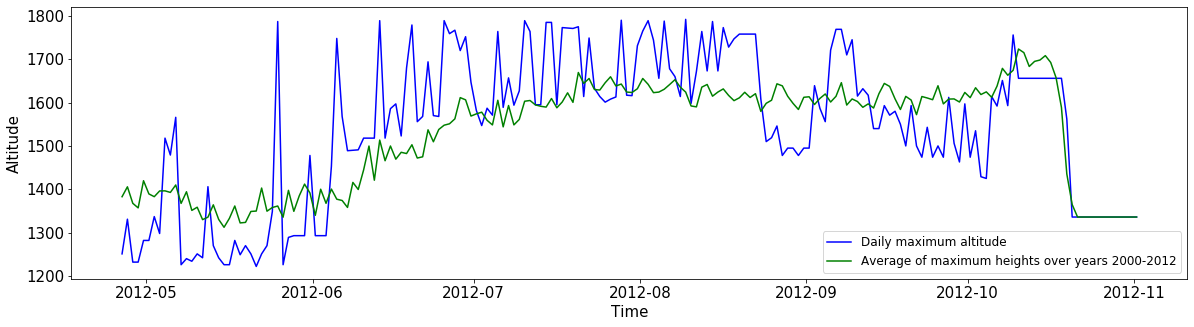

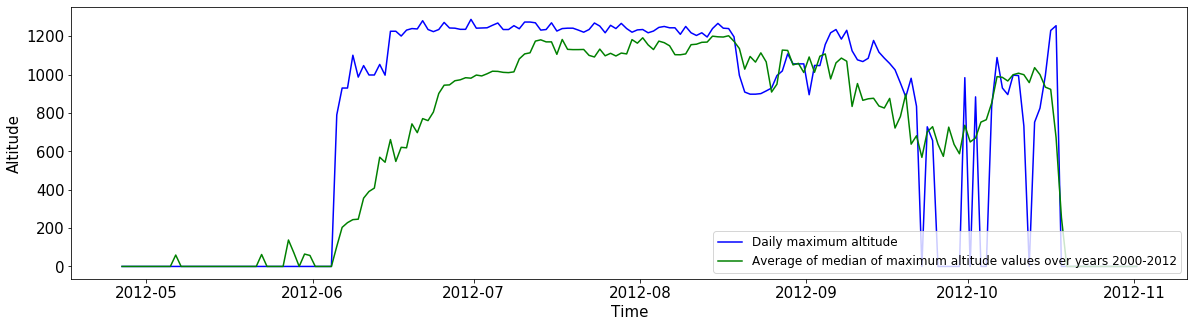

In [149]:
%%time
all_days_years_in_detials = []
avg_years = []
std_years = []
var_years = []
med_years = []
min_years = []
max_years = []


# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-13:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_maximum_height = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_maximum_height.append(eo_patch.scalar['TOP_50_HEIGHTS'][..., -1])
        
    stacked_pwfmh = np.vstack( predicted_water_feature_maximum_height )
    # extrac maximum per day
    
    all_days_years_in_detials.append(stacked_pwfmh)
    
    pwfmh_max = np.max(stacked_pwfmh, axis=0)
    pwfmh_med = np.median(stacked_pwfmh, axis=0)
    print('water feature max value for year number {} :'.format(date_range_modis[0][:4]), np.max(pwfmh_max))
    
    # avg
    tmp = np.average(pwfmh_max)
    avg_years.append(tmp)
    print('Avg:',tmp)
    # std
    tmp = np.std(pwfmh_max)
    std_years.append(tmp)
    print('Std:',tmp)
    # var
    tmp = np.var(pwfmh_max)
    var_years.append(tmp)
    print('Var:',tmp)
    # min
    tmp = np.min(pwfmh_max)
    min_years.append(tmp)
    print('Min:',np.min(pwfmh_max))
    # max
    tmp = np.max(pwfmh_max)
    max_years.append(tmp)
    print('Max:',tmp)
    
    # med
    tmp = np.median(pwfmh_max)
    max_years.append(tmp)
    print('Med:',tmp)
    med_years.append(tmp)
    
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(pwfmh_max))
    
    time = np.array(eo_patch.timestamp)[:190]
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax1.plot(time, pwfmh_max[:190], 'b-', label='Daily maximum altitude')
    ax1.legend(loc=4, prop={'size': 12});
    ax1.set_ylabel('Altitude', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    #ax2 = ax1.twinx() 
    ax1.plot(time, therteen_years_average_max[:190], 'g-', label = 'Average of maximum heights over years 2000-2012')
    ax1.legend(loc=4, prop={'size': 12})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_daily_max_wf_with_avg_of_max{0}.png'.format(str(date_range_modis[0][:4])))
    
    time = np.array(eo_patch.timestamp)[:190]
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax1.plot(time, pwfmh_med[:190], 'b-', label='Daily maximum altitude')
    ax1.legend(loc=4, prop={'size': 12});
    ax1.set_ylabel('Altitude', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    #ax2 = ax1.twinx() 
    ax1.plot(time, therteen_years_average_median[:190], 'g-', label = 'Average of median of maximum altitude values over years 2000-2012')
    ax1.legend(loc=4, prop={'size': 12})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_daily_max_wf_with_avg_of_median{0}.png'.format(str(date_range_modis[0][:4])))

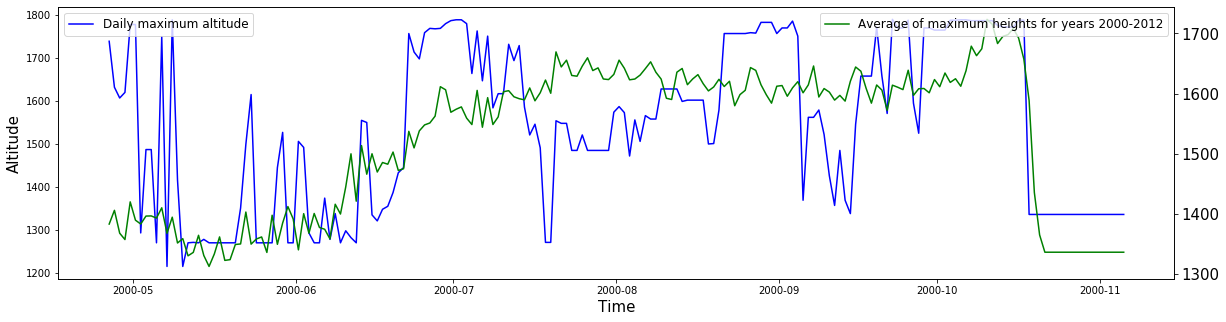

In [120]:
time = np.array(eo_patch.timestamp)
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(time, pwfmh_max[:194], 'b-', label='Daily maximum altitude')
ax1.legend(loc=2, prop={'size': 12});
ax1.set_ylabel('Altitude', fontsize=15)
ax1.set_xlabel('Time', fontsize=15)
ax2 = ax1.twinx() 
ax2.plot(time, therteen_years_average_max[:194], 'g-', label = 'Average of maximum heights for years 2000-2012')
ax2.legend(loc=1, prop={'size': 12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot_daily_max_wf_with_avg_of_max{0}.png'.format(str(date_range_modis[0][:4])))

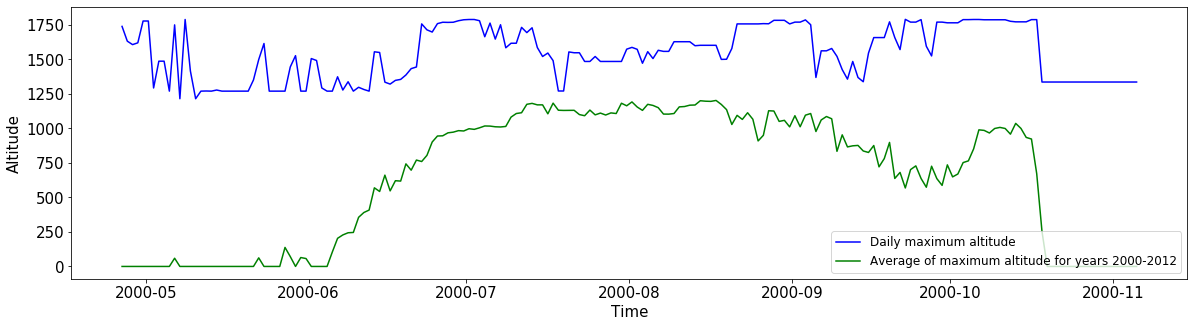

In [142]:
time = np.array(eo_patch.timestamp)
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(time, pwfmh_max[:194], 'b-', label='Daily maximum altitude')
ax1.legend(loc=4, prop={'size': 12});
ax1.set_ylabel('Altitude', fontsize=15)
ax1.set_xlabel('Time', fontsize=15)
#ax2 = ax1.twinx() 
ax1.plot(time, therteen_years_average_median[:194], 'g-', label = 'Average of median of maximum altitude values for years 2000-2012')
ax1.legend(loc=4, prop={'size': 12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot_daily_max_wf_with_avg_of_median{0}.png'.format(str(date_range_modis[0][:4])))

In [44]:
avg_years

[1544.118556701031,
 1551.9322916666667,
 1548.0618556701031,
 1512.8762886597938,
 1533.278350515464,
 1523.6958762886597,
 1500.4896907216496,
 1512.1701030927834,
 1473.5670103092784,
 1481.979381443299,
 1569.1134020618556,
 1534.7061855670104,
 1539.5876288659795]

In [43]:
med_years

[1557.0,
 1603.0,
 1556.0,
 1539.0,
 1541.0,
 1546.5,
 1542.0,
 1546.5,
 1505.0,
 1473.5,
 1571.5,
 1556.0,
 1570.5]

In [46]:
np.array(med_years) - np.array(avg_years)

array([12.8814433 , 51.06770833,  7.93814433, 26.12371134,  7.72164948,
       22.80412371, 41.51030928, 34.32989691, 31.43298969, -8.47938144,
        2.38659794, 21.29381443, 30.91237113])

In [98]:
all_days_years_in_detials[0].shape

(55, 194)

In [78]:
daily_med = []
daily_max = []
for i in all_days_years_in_detials:
    tmp = np.vstack( i )
    
    daily_med.append(np.median(tmp, axis=0))
    daily_max.append(np.max(tmp, axis=0))

In [80]:
len(daily_med)

13

In [81]:
daily_med[0].shape

(194,)

In [93]:
list_of_daily_medians = []
for year_idx, year_ctn in enumerate(daily_med):
    for day_idx, day_ctn in enumerate(year_ctn):
        if day_idx >= len(list_of_daily_medians)-1:
            list_of_daily_medians.append([day_ctn])
        else:
            list_of_daily_medians[day_idx].append(day_ctn)
            

In [99]:
list_of_daily_max = []
for year_idx, year_ctn in enumerate(daily_max):
    for day_idx, day_ctn in enumerate(year_ctn):
        if day_idx >= len(list_of_daily_max)-1:
            list_of_daily_max.append([day_ctn])
        else:
            list_of_daily_max[day_idx].append(day_ctn)
            

In [101]:
therteen_years_average_max = [np.average(i) for i in list_of_daily_max ]
therteen_years_average_median = [np.average(i) for i in list_of_daily_medians]

In [107]:
print(np.array(therteen_years_average_max).shape)
therteen_years_average_max

(195,)


[1382.8461538461538,
 1405.6923076923076,
 1367.6153846153845,
 1357.076923076923,
 1419.7692307692307,
 1389.3076923076924,
 1382.923076923077,
 1396.1538461538462,
 1396.3846153846155,
 1392.7692307692307,
 1409.923076923077,
 1367.4615384615386,
 1394.3076923076924,
 1351.3076923076924,
 1358.6153846153845,
 1330.0,
 1335.6923076923076,
 1364.1538461538462,
 1330.5384615384614,
 1312.3076923076924,
 1333.0,
 1361.4615384615386,
 1322.3846153846155,
 1323.6153846153845,
 1348.8461538461538,
 1349.7692307692307,
 1402.8461538461538,
 1349.4615384615386,
 1358.0,
 1361.3846153846155,
 1335.6153846153845,
 1397.5384615384614,
 1349.1538461538462,
 1384.6153846153845,
 1411.923076923077,
 1391.4615384615386,
 1339.923076923077,
 1400.1538461538462,
 1367.6153846153845,
 1400.4615384615386,
 1377.1538461538462,
 1374.1538461538462,
 1358.1538461538462,
 1415.8461538461538,
 1399.5384615384614,
 1444.6153846153845,
 1499.7692307692307,
 1420.923076923077,
 1513.4615384615386,
 1465.8461538

In [108]:
print(np.array(therteen_years_average_median).shape)
therteen_years_average_median

(195,)


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 59.46153846153846,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 62.23076923076923,
 0.0,
 0.0,
 0.0,
 0.0,
 137.84615384615384,
 71.53846153846153,
 0.0,
 64.53846153846153,
 57.23076923076923,
 0.0,
 0.0,
 0.0,
 0.0,
 104.53846153846153,
 203.76923076923077,
 228.30769230769232,
 244.0,
 246.30769230769232,
 355.9230769230769,
 390.6923076923077,
 408.46153846153845,
 569.5384615384615,
 543.0769230769231,
 661.3846153846154,
 547.3846153846154,
 621.0,
 618.3846153846154,
 743.2307692307693,
 697.3846153846154,
 770.6923076923077,
 760.1538461538462,
 804.7692307692307,
 901.4615384615385,
 944.8461538461538,
 946.3846153846154,
 967.9230769230769,
 972.8461538461538,
 983.7692307692307,
 981.3846153846154,
 997.6153846153846,
 993.0769230769231,
 1004.3076923076923,
 1017.6153846153846,
 1016.7692307692307,
 1011.7692307692307,
 1010.3076923076923,
 1014.2307692307693,
 1081.84

In [111]:
%%time

# application dataset building eotasks for all aval eopatches in the a eoworkflow
for idx, date_range_modis in enumerate(site.DATE_RANGES_MODIS[-13:]):
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_maximum_height = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        #predicted_water_feature_maximum_height.append(eo_patch.scalar['TOP_50_HEIGHTS'][..., -1])
        break
        
    stacked_pwfmh = all_days_years_in_detials[idx]

    pwfmh_max = np.max(stacked_pwfmh, axis=0)
    print('water feature max value for year number {} :'.format(date_range_modis[0][:4]), np.max(pwfmh_max))
    
    # avg
    tmp = np.average(pwfmh_max)
    avg_years.append(tmp)
    print('Avg:',tmp)
    # std
    tmp = np.std(pwfmh_max)
    std_years.append(tmp)
    print('Std:',tmp)
    # var
    tmp = np.var(pwfmh_max)
    var_years.append(tmp)
    print('Var:',tmp)
    # min
    tmp = np.min(pwfmh_max)
    min_years.append(tmp)
    print('Min:',np.min(pwfmh_max))
    # max
    tmp = np.max(pwfmh_max)
    max_years.append(tmp)
    print('Max:',tmp)
    
    # med
    tmp = np.median(pwfmh_max)
    max_years.append(tmp)
    print('Med:',tmp)
    med_years.append(tmp)
    
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(pwfmh_max))
    
    time = np.array(eo_patch.timestamp)
    
    fig, ax1 = plt.subplots(figsize=(20,5))
    
    ax1.plot(time, pwfmh_max, 'b-', label='Daily maximum altitude')
    ax1.legend(loc=2, prop={'size': 12});
    ax1.set_ylabel('Altitude', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    
    ax2 = ax1.twinx() 
    ax2.plot(time, therteen_years_average_max, 'y-', label = 'Average of maximum heights for years 2000-2012')
    ax2.legend(loc=1, prop={'size': 12})
    #ax2.set_ylabel('Air Temperature (C)', fontsize=15)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_daily_max_wf_with_avg_of_max{0}.png'.format(str(date_range_modis[0][:4])))

Reading EOPatches from: ('2000-04-26', '2000-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2000_04-2000_11/


IndexError: list index out of range

#### 9. Plot sum of water features with daily average sum over 13 years

In [ ]:
%%time
sum_of_all_days_years_in_detials = []
sum_years = []

# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-13:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_maximum_height = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_maximum_height.append(eo_patch.scalar['TOP_50_HEIGHTS'][..., -1])
        
    stacked_pwfmh = np.vstack( predicted_water_feature_maximum_height )
    # extrac maximum per day
    
    all_days_years_in_detials.append(stacked_pwfmh)
    
    pwfmh_max = np.max(stacked_pwfmh, axis=0)
    pwfmh_med = np.median(stacked_pwfmh, axis=0)
    print('water feature max value for year number {} :'.format(date_range_modis[0][:4]), np.max(pwfmh_max))
    
    # avg
    tmp = np.average(pwfmh_max)
    avg_years.append(tmp)
    print('Avg:',tmp)
    # std
    tmp = np.std(pwfmh_max)
    std_years.append(tmp)
    print('Std:',tmp)
    # var
    tmp = np.var(pwfmh_max)
    var_years.append(tmp)
    print('Var:',tmp)
    # min
    tmp = np.min(pwfmh_max)
    min_years.append(tmp)
    print('Min:',np.min(pwfmh_max))
    # max
    tmp = np.max(pwfmh_max)
    max_years.append(tmp)
    print('Max:',tmp)
    
    # med
    tmp = np.median(pwfmh_max)
    max_years.append(tmp)
    print('Med:',tmp)
    med_years.append(tmp)
    
    print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(pwfmh_max))
    
    time = np.array(eo_patch.timestamp)[:190]
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax1.plot(time, pwfmh_max[:190], 'b-', label='Daily maximum altitude')
    ax1.legend(loc=4, prop={'size': 12});
    ax1.set_ylabel('Altitude', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    #ax2 = ax1.twinx() 
    ax1.plot(time, therteen_years_average_max[:190], 'g-', label = 'Average of maximum heights over years 2000-2012')
    ax1.legend(loc=4, prop={'size': 12})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_daily_max_wf_with_avg_of_max{0}.png'.format(str(date_range_modis[0][:4])))
    
    time = np.array(eo_patch.timestamp)[:190]
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax1.plot(time, pwfmh_med[:190], 'b-', label='Daily maximum altitude')
    ax1.legend(loc=4, prop={'size': 12});
    ax1.set_ylabel('Altitude', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    #ax2 = ax1.twinx() 
    ax1.plot(time, therteen_years_average_median[:190], 'g-', label = 'Average of median of maximum altitude values over years 2000-2012')
    ax1.legend(loc=4, prop={'size': 12})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_daily_max_wf_with_avg_of_median{0}.png'.format(str(date_range_modis[0][:4])))

In [156]:
%%time
#all_years_predicted_water_features_count = []
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-4:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    all_years_predicted_water_features_count.append(daily_sum_of_pwf)
#print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
#print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))
#time = np.array(eo_patch.timestamp)
#fig, ax1 = plt.subplots(figsize=(20,5))
#ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
#ax1.legend(loc=2, prop={'size': 12});
#ax1.set_ylabel('Predicted water feature count', fontsize=15)
#ax1.set_xlabel('Time', fontsize=15)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.savefig('plot_temp_vs_water_{}.png'.format(str(date_range_modis[0][:4])))

Reading EOPatches from: ('2000-04-26', '2000-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2000_04-2000_11/
Reading EOPatches from: ('2001-04-26', '2001-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2001_04-2001_11/
Reading EOPatches from: ('2002-04-26', '2002-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2002_04-2002_11/
Reading EOPatches from: ('2003-04-26', '2003-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2003_04-2003_11/
Reading EOPatches from: ('2004-04-26', '2004-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2004_04-2004_11/
Reading EOPatches from: ('2005-04-26', '2005-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2005_04-2005_11/
Reading EOPatches from: ('2006-04-26', '2006-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2006_04-2006_11/
Reading EOPatches from: ('2007-04-26', '2007-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2007_04-2007_11/
Reading EOPatches from: ('2008-04-26', '2008-11-05')
../../data/

In [157]:
%%time
#all_years_predicted_water_features_count = []
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-4:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])
        #del eo_patch
        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    all_years_predicted_water_features_count.append(daily_sum_of_pwf)
#print('water feature for year number {} :'.format(date_range_modis[0][:4]), np.sum(daily_sum_of_pwf))
#print('top day per season {} :'.format(date_range_modis[0][:4]), np.max(daily_sum_of_pwf))
#time = np.array(eo_patch.timestamp)
#fig, ax1 = plt.subplots(figsize=(20,5))
#ax1.plot(time, daily_sum_of_pwf, 'b-', label='Predicted water feature count')
#ax1.legend(loc=2, prop={'size': 12});
#ax1.set_ylabel('Predicted water feature count', fontsize=15)
#ax1.set_xlabel('Time', fontsize=15)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#plt.savefig('plot_temp_vs_water_{}.png'.format(str(date_range_modis[0][:4])))

Reading EOPatches from: ('2009-04-26', '2009-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2009_04-2009_11/
Reading EOPatches from: ('2010-04-26', '2010-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2010_04-2010_11/
Reading EOPatches from: ('2011-04-26', '2011-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/
Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
Wall time: 13min 32s


In [158]:
predicted_water_feature_count[0].shape

(194,)

In [161]:
len(all_years_predicted_water_features_count[0])

194

In [165]:
list_of_daily_sum = []
for year_idx, year_ctn in enumerate(all_years_predicted_water_features_count):
    for day_idx, day_ctn in enumerate(year_ctn):
        if day_idx >= len(list_of_daily_sum)-1:
            list_of_daily_sum.append([day_ctn])
        else:
            list_of_daily_sum[day_idx].append(day_ctn)

In [173]:
len(list_of_daily_sum[0])

13

In [172]:
np.average(np.array(list_of_daily_sum), axis=0 )

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [174]:
therteen_years_average_sum_wat_feat = [np.average(i) for i in list_of_daily_sum ]

In [175]:
therteen_years_average_sum_wat_feat

[23105.53846153846,
 23467.0,
 22999.53846153846,
 22555.30769230769,
 21116.923076923078,
 21076.76923076923,
 20804.0,
 20915.384615384617,
 20712.076923076922,
 19989.076923076922,
 21868.846153846152,
 19939.153846153848,
 19873.69230769231,
 20179.846153846152,
 20680.153846153848,
 21079.23076923077,
 19775.76923076923,
 19695.615384615383,
 19717.153846153848,
 20496.23076923077,
 20806.923076923078,
 21850.69230769231,
 22311.23076923077,
 22506.30769230769,
 23396.923076923078,
 23085.69230769231,
 24122.153846153848,
 26421.30769230769,
 27301.53846153846,
 25141.384615384617,
 26020.384615384617,
 35589.46153846154,
 29238.76923076923,
 32011.153846153848,
 32180.076923076922,
 32004.384615384617,
 32214.46153846154,
 35408.92307692308,
 34798.38461538462,
 36244.230769230766,
 36849.0,
 38211.846153846156,
 43000.61538461538,
 44876.846153846156,
 44068.307692307695,
 51692.846153846156,
 55146.38461538462,
 64342.846153846156,
 70564.76923076923,
 67577.76923076923,
 73484

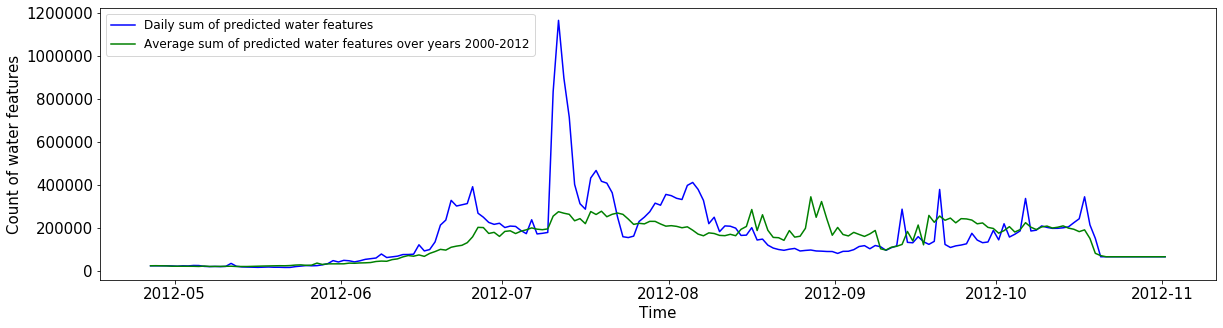

In [177]:
time = np.array(eo_patch.timestamp)[:190]
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(time, daily_sum_of_pwf[:190], 'b-', label='Daily sum of predicted water features')
ax1.legend(loc=2, prop={'size': 12});
ax1.set_ylabel('Count of water features', fontsize=15)
ax1.set_xlabel('Time', fontsize=15)
#ax2 = ax1.twinx() 
ax1.plot(time, therteen_years_average_sum_wat_feat[:190], 'g-', label = 'Average sum of predicted water features over years 2000-2012')
ax1.legend(loc=2, prop={'size': 12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot_daily_sum_wf_vs_avg_of_daily_sum_over_years{0}.png'.format(str(date_range_modis[0][:4])))

Reading EOPatches from: ('2009-04-26', '2009-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2009_04-2009_11/
Reading EOPatches from: ('2010-04-26', '2010-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2010_04-2010_11/
Reading EOPatches from: ('2011-04-26', '2011-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2011_04-2011_11/
Reading EOPatches from: ('2012-04-26', '2012-11-05')
../../data/EOPatches/MODIS/UPE_PROMICE/UTM_22N/2012_04-2012_11/
Wall time: 15min 13s


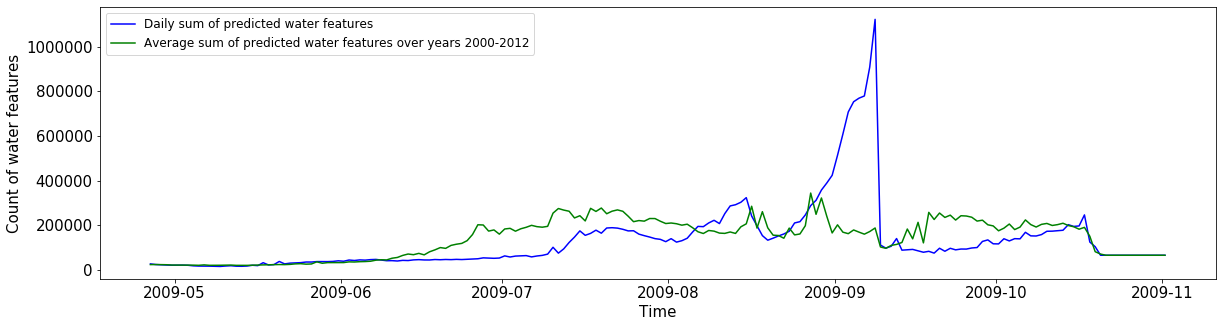

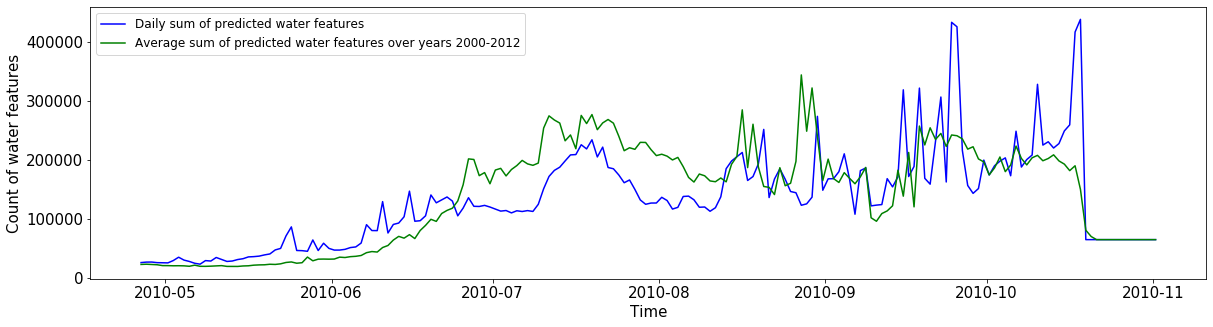

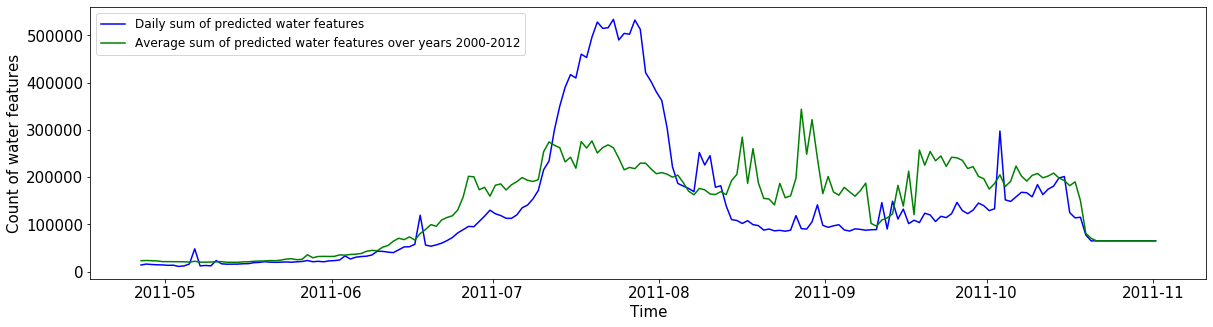

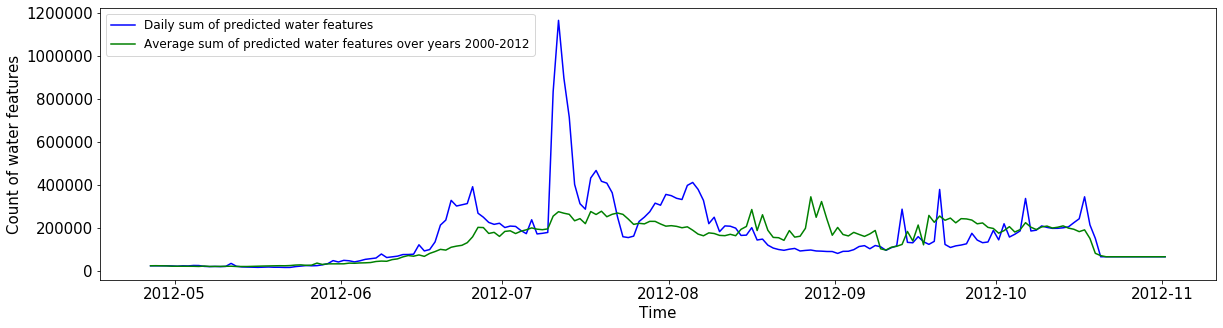

In [181]:
%%time
all_years_predicted_water_features_count = []
# application dataset building eotasks for all aval eopatches in the a eoworkflow
for date_range_modis in site.DATE_RANGES_MODIS[-4:]:
    print('Reading EOPatches from:', date_range_modis)
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[0], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_modis)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    print(eopatches_filepath)
    predicted_water_feature_count = []
    for eopatch_name in list_of_available_patches:
        eo_patch = EOPatch.load(eopatches_filepath+eopatch_name)
        predicted_water_feature_count.append(eo_patch.scalar_timeless['PREDICTED_WATER_MASK_COVERAGE'])

        
    stacked_pwf = np.vstack( predicted_water_feature_count )
    daily_sum_of_pwf = np.sum(stacked_pwf, axis=0)
    all_years_predicted_water_features_count.append(daily_sum_of_pwf)
    
    time = np.array(eo_patch.timestamp)[:190]
    fig, ax1 = plt.subplots(figsize=(20,5))
    ax1.plot(time, daily_sum_of_pwf[:190], 'b-', label='Daily sum of predicted water features')
    ax1.legend(loc=2, prop={'size': 12});
    ax1.set_ylabel('Count of water features', fontsize=15)
    ax1.set_xlabel('Time', fontsize=15)
    #ax2 = ax1.twinx() 
    ax1.plot(time, therteen_years_average_sum_wat_feat[:190], 'g-', label = 'Average sum of predicted water features over years 2000-2012')
    ax1.legend(loc=2, prop={'size': 12})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig('plot_daily_sum_wf_vs_avg_of_daily_sum_over_years{0}.png'.format(str(date_range_modis[0][:4])))